Importing Python Libraries

In [88]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

Let's load up the hotel booking data & fixing the data frame delimiter issue

In [89]:
df = pd.read_csv('hotel-booking-data.txt', delimiter='\t')
df.head()

,Date,Company,Person Name,Room number
0,1-Jan-2022,Avamba,Anatole Ridehalgh,4008.0
1,1-Jan-2022,Fatz,Aldrich McKevin,2002.0
2,1-Jan-2022,Leexo,Stanley Hadrill,4012.0
3,Hotels,NaN,NaN,NaN
4,1-Jan-2022,Rhyzio,Lyndell Tice,1006.0


Using basic pandas functions

In [90]:
df['Company'].value_counts()

Leexo           3
Fivechat        3
Quinu           3
Jabbersphere    2
Twitterlist     2
               ..
Topiclounge     1
Shufflebeat     1
Skyvu           1
Youspan         1
Twitterworks    1
Name: Company, Length: 114, dtype: int64

In [91]:
df['mask'] = df['Room number'].isna()
df

,Date,Company,Person Name,Room number,mask
0,1-Jan-2022,Avamba,Anatole Ridehalgh,4008.0,False
1,1-Jan-2022,Fatz,Aldrich McKevin,2002.0,False
2,1-Jan-2022,Leexo,Stanley Hadrill,4012.0,False
3,Hotels,NaN,NaN,NaN,True
4,1-Jan-2022,Rhyzio,Lyndell Tice,1006.0,False
...,...,...,...,...,...
190,Cleartrip,NaN,NaN,NaN,True
191,1-Jan-2022,Fivechat,Corabella Saye,4008.0,False
192,1-Jan-2022,Innojam,Leandra Potapczuk,5002.0,False
193,1-Jan-2022,Twitterworks,Valentia Ledson,1010.0,False


In [92]:
df['Room number'].isna()

0      False
1      False
2      False
3       True
4      False
       ...  
190     True
191    False
192    False
193    False
194     True
Name: Room number, Length: 195, dtype: bool

Adding a column with IF this then that type rule

In [93]:
df['Text Value'] = np.where(df['mask'],df['Date'],np.nan)
df

,Date,Company,Person Name,Room number,mask,Text Value
0,1-Jan-2022,Avamba,Anatole Ridehalgh,4008.0,False,NaN
1,1-Jan-2022,Fatz,Aldrich McKevin,2002.0,False,NaN
2,1-Jan-2022,Leexo,Stanley Hadrill,4012.0,False,NaN
3,Hotels,NaN,NaN,NaN,True,Hotels
4,1-Jan-2022,Rhyzio,Lyndell Tice,1006.0,False,NaN
...,...,...,...,...,...,...
190,Cleartrip,NaN,NaN,NaN,True,Cleartrip
191,1-Jan-2022,Fivechat,Corabella Saye,4008.0,False,NaN
192,1-Jan-2022,Innojam,Leandra Potapczuk,5002.0,False,NaN
193,1-Jan-2022,Twitterworks,Valentia Ledson,1010.0,False,NaN


Filling the text value up (using fillna method)

In [94]:
df['Text Value'].fillna(method='bfill',inplace=True)
df

,Date,Company,Person Name,Room number,mask,Text Value
0,1-Jan-2022,Avamba,Anatole Ridehalgh,4008.0,False,Hotels
1,1-Jan-2022,Fatz,Aldrich McKevin,2002.0,False,Hotels
2,1-Jan-2022,Leexo,Stanley Hadrill,4012.0,False,Hotels
3,Hotels,NaN,NaN,NaN,True,Hotels
4,1-Jan-2022,Rhyzio,Lyndell Tice,1006.0,False,Booking
...,...,...,...,...,...,...
190,Cleartrip,NaN,NaN,NaN,True,Cleartrip
191,1-Jan-2022,Fivechat,Corabella Saye,4008.0,False,Hotels
192,1-Jan-2022,Innojam,Leandra Potapczuk,5002.0,False,Hotels
193,1-Jan-2022,Twitterworks,Valentia Ledson,1010.0,False,Hotels


Removing the unnecessary rows

In [95]:
df.dropna(inplace=True)
df

,Date,Company,Person Name,Room number,mask,Text Value
0,1-Jan-2022,Avamba,Anatole Ridehalgh,4008.0,False,Hotels
1,1-Jan-2022,Fatz,Aldrich McKevin,2002.0,False,Hotels
2,1-Jan-2022,Leexo,Stanley Hadrill,4012.0,False,Hotels
4,1-Jan-2022,Rhyzio,Lyndell Tice,1006.0,False,Booking
5,1-Jan-2022,Eadel,Broderic Handscombe,3015.0,False,Booking
...,...,...,...,...,...,...
186,1-Jan-2022,Tagpad,Stephani Lafee,1015.0,False,Expedia
187,1-Jan-2022,Meevee,Victoria Lavery,7002.0,False,Expedia
191,1-Jan-2022,Fivechat,Corabella Saye,4008.0,False,Hotels
192,1-Jan-2022,Innojam,Leandra Potapczuk,5002.0,False,Hotels


Doing Quick Analysis of data (tables & graphs)

In [96]:
df.value_counts('Text Value')

Text Value
Expedia             48
Hotels              39
Booking             24
Travel Agent 007    12
Cleartrip           11
dtype: int64

<Axes: xlabel='Text Value'>

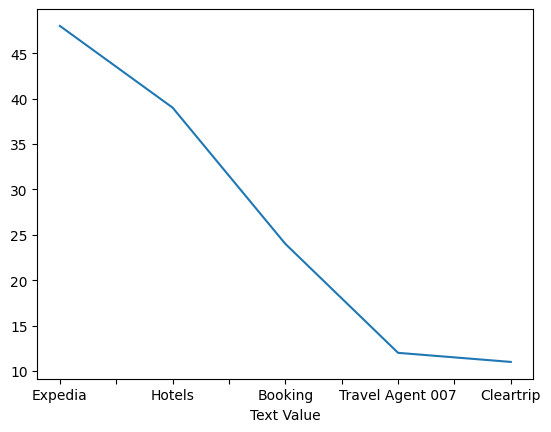

In [97]:
df2 = df.value_counts('Text Value')
df2.plot()